<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitskiy](https://yorko.github.io) (@yorko). Translated and edited by [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), [Eugene Mashkin](https://www.linkedin.com/in/eugene-mashkin-88490883/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the license [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Free use is permitted for any non-commercial purpose with an obligatory indication of the names of the authors and of the source.

# <center>Assignment #7. Fall 2018
    
## <center> Principal Component Analysis and Clustering

In this assignment, we are going to walk through `sklearn` built-in implementations of dimensionality reduction and clustering methods. Answers should be submitted using [this web-form](https://docs.google.com/forms/d/1Jx0i6fjdDv3ZYBz1kF-TEUDnmfpxJtnQpiU_EVgvfQA/edit).

## 1. Principal Component Analysis

First import all required modules:

In [187]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import datasets

Use the given toy data set:

In [2]:
X = np.array([[2., 13.], [1., 3.], [6., 19.],
              [7., 18.], [5., 17.], [4., 9.],
              [5., 22.], [6., 11.], [8., 25.]])

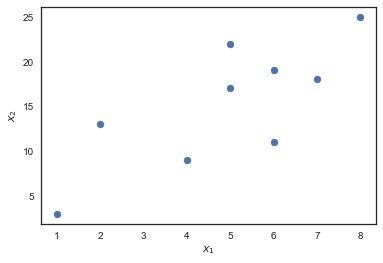

In [3]:
plt.scatter(X[:,0], X[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

#### Question 1. What is the angle between the $x_1$ axis and the vector corresponding to the first principal component for this data (don't forget to scale data using `StandardScaler`)? 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q1__*

- 30 degrees
- 45 degrees [+]
- 60 degrees
- 75 degrees

In [4]:
# Your code here
X_scaled = StandardScaler().fit_transform(X)

In [152]:
from scipy.linalg import svd
U, Sigma, VT = svd(X_scaled)

In [155]:
math.degrees(math.acos(VT[0][0]))

45.00000000000001

In [156]:
Sigma

array([3.99623223, 1.42482559])

In [7]:
from sklearn import decomposition

In [12]:
pca = decomposition.PCA(n_components=1)
X_pca = pca.fit(X_scaled)

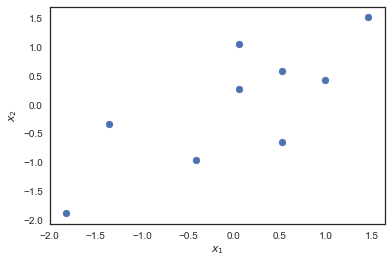

In [14]:
plt.scatter(X_scaled[:,0], X_scaled[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

In [65]:
import math

In [80]:
X_scaled[0]

array([-1.35534369, -0.3430981 ])

In [84]:
cos0 = X_scaled[0].T.dot(X_pca.components_[0]) / math.sqrt(X_scaled[0][0]**2 + X_scaled[0][1]**2)

In [85]:
cos0

0.8590108136943948

In [87]:
math.degrees(math.acos(cos0))

30.794302119545225

In [62]:
X_pca.components_[0]

-0.7071067811865475

#### Question 2. What are the eigenvalues of the $X^{\text{T}}X$ matrix, given $X$, a scaled matrix from the previous question?

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q2__*

 - 4 and 1.42
 - 16.2 and 2702.8
 - 4.02 and 51.99
 - 15.97 and 2.03 [+]

In [16]:
X_scaled

array([[-1.35534369, -0.3430981 ],
       [-1.82450112, -1.88703953],
       [ 0.52128604,  0.58326676],
       [ 0.99044347,  0.42887262],
       [ 0.0521286 ,  0.27447848],
       [-0.41702883, -0.96067467],
       [ 0.0521286 ,  1.04644919],
       [ 0.52128604, -0.65188638],
       [ 1.4596009 ,  1.50963162]])

In [21]:
X_scaled.T.dot(X_scaled)

array([[9.        , 6.96987204],
       [6.96987204, 9.        ]])

In [19]:
# Your code here
eigenvalues, eigenvectors = np.linalg.eig(X_scaled.T.dot(X_scaled))

In [20]:
eigenvalues

array([15.96987204,  2.03012796])

#### Question 3. What is the meaning of the two numbers from the previous question?

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q3__*

- their squares tell what part of the initial data's variance is explained by principal components [+]
- they define a rotation angle between the first principal component and the initial axis
- those numbers tell what part of the initial data's variance is explained by principal components
- the square roots of those numbers define a rotation angle between the first principal component and the initial axis

Let's load a dataset of peoples' faces and output their names. (This step requires stable, fast internet connection.)

In [22]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


Let's look at some faces. All images are stored in a handy `lfw_people.images` array.

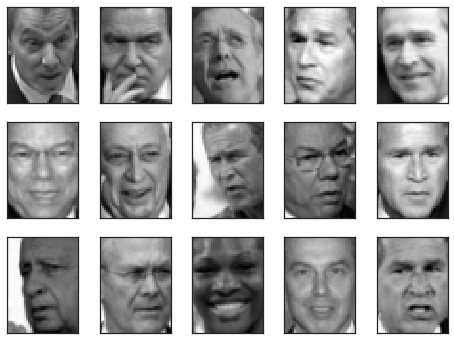

In [23]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')

In [26]:
X = StandardScaler().fit_transform(lfw_people.data)

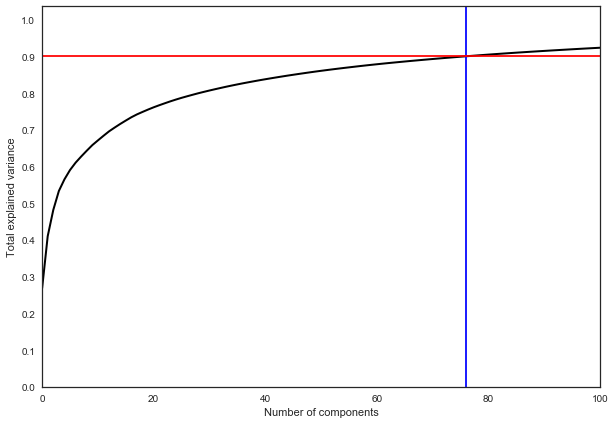

In [52]:
pca = decomposition.PCA(svd_solver='randomized', random_state=1).fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(76, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [158]:
?decomposition.PCA

In [159]:
pca_limited = decomposition.PCA(0.9).fit(X)

In [160]:
len(pca_limited.components_)

77

#### Question 4. What 's the **minimal** number of principal components is needed to explain 90% variance in the data (scaled using  StandardScaler)?

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q4__*

- 75
- 76
- 77 [+]
- 78

For this task, you should be using the [`svd_solver='randomized'`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) parameter, which is a PCA approximation, but it significantly increases performance on large data sets. Use fixed `random_state=1` for comparable results.

In [1]:
# Your code here

Print a picture showing the first 30 principal components (don't be scared when you see the results). In order to create it, use 30 vectors from `pca.components_`, reshape them to their initial size (50 x 37), and display. Specify `cmap`='binary'.

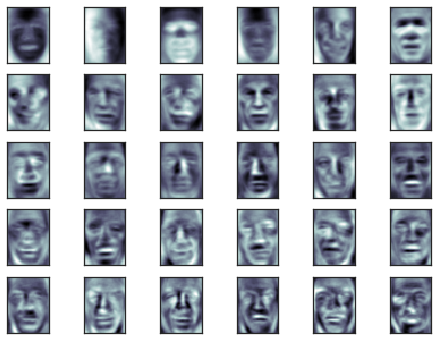

In [59]:
# Your code here
fig = plt.figure(figsize=(8,6))
for i in range(30):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

#### Question 5. </font> Within the first 30 principal components, which one brightens the left side of the face? More specifically, which principal component corresponds to a linear combination of the initial features (pixels' intensity), which, when shown as an image, looks like a photo highlighted from the right side (the same as a face highlighted from its left side)?

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q5__*

- 1
- 2 [+]
- 4
- 5

In [92]:
X.shape

(1560, 1850)

Now let's create a projection of faces onto the space of the first two principal components. 

#### Question 6. Who looks the least similar to the other people in the dataset if we only consider the two first principal components? 

To answer this question, take the first two principal components from the scaled data, evaluate two mean principal components' values for each person over all their images in the dataset (again, use both svd_solver='randomized' and random_state=1). Then, with 12 two-dimensional points, find the one which has the largest distance from the others (by Euclidean distance). You can do this either precisely or approximately using `sklearn.metrics.euclidean_distances` and `seaborn.heatmap`.

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q6__*

- Colin Powell
- George W Bush
- Jacques Chirac
- Serena Williams [+]

In [117]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


In [103]:
X_transformed = decomposition.PCA(svd_solver='randomized', random_state=1, n_components=2).fit_transform(X)

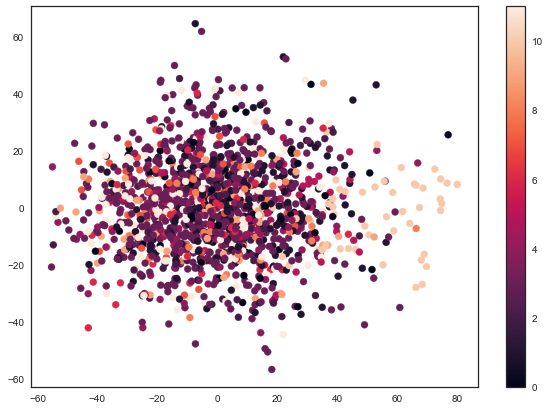

In [176]:
plt.figure(figsize=(10,7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=lfw_people.target)
plt.colorbar()
plt.show()

In [137]:
X_transformed.shape

(1560, 2)

In [162]:
len(lfw_people.target == 0)

1560

In [171]:
means = []
for i, name in enumerate(lfw_people.target_names):
    X_sub = X_transformed[lfw_people.target == i]
    print(X_sub.shape)
    means.append([np.mean(X_sub[0]), np.mean(X_sub[1])])

(77, 2)
(236, 2)
(121, 2)
(530, 2)
(109, 2)
(71, 2)
(52, 2)
(55, 2)
(53, 2)
(60, 2)
(52, 2)
(144, 2)


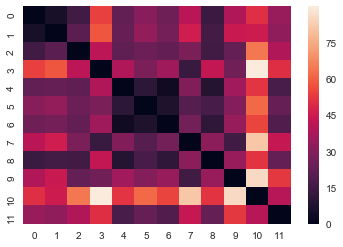

In [201]:
sns.heatmap(sklearn.metrics.euclidean_distances(means))

In [168]:
lfw_people.target_names[10]

'Serena Williams'

In [172]:
np.sum(sklearn.metrics.euclidean_distances(means), axis=1)

array([332.9115 , 353.1356 , 319.49652, 480.16577, 265.30453, 287.89478,
       266.32315, 377.0252 , 266.68948, 420.6434 , 678.0281 , 376.14062],
      dtype=float32)

## 2. Clustering

For the next question, load the housing prices dataset:

In [174]:
boston = datasets.load_boston()
X = boston.data

In [177]:
X.shape

(506, 13)

In [179]:
?KMeans

0.6249488682924336
3
0.3277561168161608
4
1.018114663364565
5
0.6315352223314094
6
0.6807016201670321
7
0.9067297497809309
8


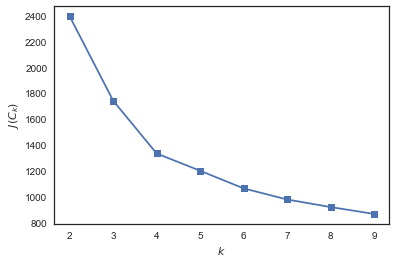

In [185]:
inertia = []
ks = range(2, 10)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
for i in range(1, len(inertia) - 1):
    d = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])
    print(d)
    print(ks[i])
plt.plot(range(2, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Using the elbow-method (reference [article 7](https://medium.com/@libfun/db7879568417) of the course), find the optimal number of clusters to set as a hyperparameter for the k-means algorithm.

#### Question 7.  What is the optimal number of clusters to use on housing prices data set according to the elbow method? Use `random_state=1` in the k-means method, and don't scale the data.

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q7__*

- 2
- 3
- 4 [+]
- 5

In this case, we are looking for the most significant curve fracture on the `Cluster number vs Centroid distances` graph. Consider the number of clusters from 2 to 10. Use `random_state=1` for the k-means algorithm initialization.

In [ ]:
# Your code here

Go back to the faces dataset (that is already scaled). Imagine that we did not know the names for who was each photo but that we knew that there were 12 different people. Let's compare clustering results from 4 algorithms - k-means, Agglomerative clustering, Affinity Propagation, and Spectral clustering. Use the same respective parameters as in the end of [this article](https://medium.com/@libfun/db7879568417), only change the number of clusters to 12.

In [188]:
# Your code here
X, y = lfw_people.data, lfw_people.target

clusters_n = 12
algorithms = []
algorithms.append(KMeans(n_clusters=clusters_n, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=clusters_n, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=clusters_n))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.020851,0.065449,0.092717,0.080958,0.086439,0.048912
Affinity,0.011917,0.070108,0.276269,0.138634,0.184623,0.020654
Spectral,0.009477,0.065966,0.084370,0.090947,0.087535,-0.041369
Agglomerative,0.016692,0.060287,0.086180,0.076155,0.080858,0.014840


In [189]:
lfw_people.target

array([11,  4,  2, ...,  3, 11,  5])

In [196]:
y = (lfw_people.target_names[lfw_people.target] == 'Serena Williams').astype(int)

In [198]:
len(y[y == 1])

52

In [199]:
# Your code here
y = y = (lfw_people.target_names[lfw_people.target] == 'Serena Williams').astype(int)
X = lfw_people.data

clusters_n = 2
algorithms = []
algorithms.append(KMeans(n_clusters=clusters_n, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=clusters_n, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=clusters_n))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.027111,0.042255,0.199435,0.042710,0.070353,0.119407
Affinity,0.001505,0.016969,0.672058,0.023132,0.044724,0.020654
Spectral,0.171740,0.080125,0.269952,0.080740,0.124302,0.111273
Agglomerative,0.015702,0.033423,0.159867,0.033877,0.055907,0.091115


#### Question 8. Select all of the correct statements:

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q8__*

- Agglomerative clustering worked better than others by all metrics
- Clustering results are disappointing - there isn't a metric that exceeds 0.35 [+]
- Affinity Propagation worked better than Spectral clustering by all metrics [+]
- Considering only 2 clusters (whether it is Serena Williams or not) and comparing clustering results with a binary vector, we can see that clustering algorithms work better, with some metrics exceeding 66% [+]

Use the coordinates of the 12 "average" people's images you got before. Draw a dendrogram for them. Use `scipy.cluster.hierarchy` and `scipy.spatial.distance.pdist`, take parameters values from the appropriate example in the [article](https://medium.com/@libfun/db7879568417).

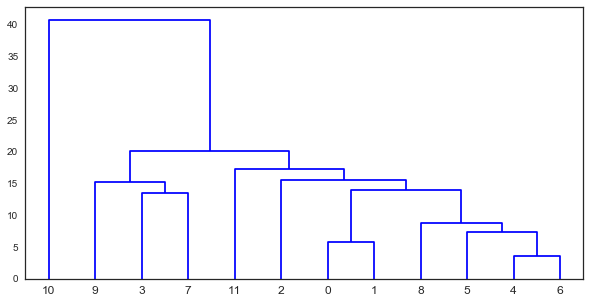

In [202]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(means)
Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)
# Your code here

In [206]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

#### Question 9. Look at the dendrogram and consider a step when just two clusters are left: Serena Williams vs. all.  Who was the last person added to the "big" cluster?  

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q9__*

- Gerhard Schroeder
- Jean Chretien 
- John Ashcroft
- Junichiro Koizumi [+]